In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=574fcdddaf159e5b3d30279455ecc5eff59b331f3d5978ad950fc1a94cc8491b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

import face_recognition
import cv2
## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.
from google.colab.patches import cv2_imshow 
from sklearn.metrics.pairwise import euclidean_distances

from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split

import pickle

sns.set()

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_img_in_folder(path = 'out/*.jpg'):
  images = []
  for img_path in glob.glob('out/*.jpg'):
      images.append(mpimg.imread(img_path))

  plt.figure(figsize=(20,10))
  columns = 5
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(image)
      plt.grid(None)

In [6]:
cap = cv2.VideoCapture('my_face.mp4')
if (cap.isOpened()== False):
  print("Error opening video stream or file")

try:
  shutil.rmtree('out')
except:
  pass
os.mkdir('out')

In [7]:
faces = []
frameCount = 0
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_frame = frame[:, :, ::-1]

        face_locations = face_recognition.face_locations(rgb_frame, number_of_times_to_upsample=0, model="cnn")
        if len(face_locations) <= 0: continue

        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations, model="large")
        for enc in face_encodings:
          faces.append(enc)

        (top, right, bottom, left) = face_locations[0]
        # cv2.rectangle(frame, (left, top), (right, bottom), (0,0,255))

        cv2.imwrite('./out/' + str(frameCount) + '.jpg', frame[top:bottom, left:right])

        frameCount += 1
        print(frameCount)

        # cv2_imshow(frame)
        # break
 
    # Break the loop
    else:
        break
print("Done")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Done


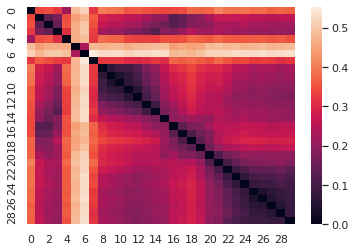

In [8]:
# Heatmap between faces
dist = euclidean_distances(faces, faces)
sns.heatmap(pd.DataFrame(data=dist))

## Train Clasification

https://machinelearningmastery.com/one-class-classification-algorithms/

In [25]:
# Split to train and test
# X_train, X_test = train_test_split(faces)
# (len(X_train), len(X_test))

X_train = faces
X_test = faces

In [ ]:
model = svm.OneClassSVM(gamma='scale', nu=0.1)
model.fit(X_train)
model.predict(X_test)

In [ ]:
# IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(X_train)
model.predict(X_test)

In [30]:
# LocalOutlierFactor
model = LocalOutlierFactor(novelty=True)
model.fit(X_train)
model.predict(X_test)

array([ 1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [27]:
# LocalOutlierFactor
model = EllipticEnvelope(assume_centered=True, contamination=0.001)
model.fit(X_train)
model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# predict random
model.predict([np.random.rand(128)])

array([-1])

In [32]:
# by brother
test=[-6.45478591e-02,  2.30714157e-02,  8.97634327e-02, -1.64343044e-04,
       -3.98034751e-02, -2.81083360e-02, -9.04736668e-02, -1.29681379e-01,
        8.76469016e-02, -1.32105321e-01,  2.47416019e-01, -9.43352357e-02,
       -2.19587192e-01, -9.98777822e-02, -9.73895192e-02,  1.90041512e-01,
       -1.51133120e-01, -8.08149725e-02, -1.87213495e-02, -2.42617801e-02,
        7.50468597e-02,  3.41735780e-03,  3.19311619e-02,  1.64952874e-02,
       -9.62564349e-02, -3.44605684e-01, -1.44221425e-01, -9.35157612e-02,
       -4.98549119e-02, -5.65728247e-02, -4.01272327e-02,  2.98429206e-02,
       -1.36355877e-01, -7.04748929e-03, -1.56580508e-02,  5.22924587e-02,
       -5.02838418e-02, -7.62201548e-02,  1.78069219e-01, -2.95175202e-02,
       -1.60057276e-01, -3.89298946e-02,  8.34382251e-02,  2.12336034e-01,
        1.81590557e-01,  8.81583691e-02,  3.99040803e-02, -1.46425486e-01,
        1.02521293e-01, -1.95686892e-01,  4.48150672e-02,  1.17895350e-01,
        6.87828735e-02,  9.78457332e-02,  1.03137568e-02, -9.22834352e-02,
        4.26158905e-02,  3.99790406e-02, -7.27208182e-02,  6.24453314e-02,
        7.78456330e-02, -8.45388994e-02, -1.77672599e-03, -2.21159011e-02,
        2.52407432e-01,  6.75230473e-02, -1.33539647e-01, -1.33019999e-01,
        1.30758226e-01, -1.97766751e-01, -9.74317193e-02,  3.84976491e-02,
       -1.37157738e-01, -1.73642591e-01, -3.78144085e-01, -1.71359777e-02,
        4.20946777e-01,  7.69701526e-02, -1.65974170e-01,  2.37741694e-03,
       -5.88873401e-02, -7.61426240e-03,  1.66734293e-01,  1.70726746e-01,
       -2.44046114e-02, -2.83494890e-02, -1.24928586e-01, -7.66336918e-03,
        2.69353271e-01, -1.11342303e-01, -5.21498024e-02,  2.03543320e-01,
       -7.57986307e-03,  9.76674557e-02,  2.12458186e-02,  7.98219964e-02,
       -4.25673127e-02,  4.22687232e-02, -7.08242208e-02,  5.48974276e-02,
        7.23520368e-02, -3.00304815e-02, -1.97887421e-03,  1.07016847e-01,
       -9.62172449e-02,  1.11982077e-01, -1.29232854e-02,  3.17546949e-02,
        7.25904554e-02,  8.72597098e-03, -1.88271374e-01, -1.02373384e-01,
        1.51123896e-01, -1.89945489e-01,  1.33437037e-01,  1.55963719e-01,
        5.88291958e-02,  1.03036344e-01,  1.33548290e-01,  1.84955597e-01,
       -5.20907715e-02, -2.76102424e-02, -1.94547549e-01, -2.06883121e-02,
        4.51285578e-02,  2.64479071e-02,  5.22405803e-02,  2.12044343e-02]
model.predict([test])

array([-1])

In [ ]:
# save 
with open('my_face_encode.npy', 'wb') as f:
  np.save(f, faces)

In [ ]:
filename='myface.IsolationForest.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename='myface.OneClassSVM.pkl'
pickle.dump(model, open(filename, 'wb'))

In [33]:
filename='myface.LocalOutlierFactor.pkl'
pickle.dump(model, open(filename, 'wb'))

## Apendix

### Dlib Model

In [34]:
# Apendix
# Dlib model
import face_recognition_models
face_recognition_model = face_recognition_models.face_recognition_model_location()
cnn_face_detection_model = face_recognition_models.cnn_face_detector_model_location()
predictor_68_point_model = face_recognition_models.pose_predictor_model_location()

(face_recognition_model, cnn_face_detection_model, predictor_68_point_model)

('/usr/local/lib/python3.6/dist-packages/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat',
 '/usr/local/lib/python3.6/dist-packages/face_recognition_models/models/mmod_human_face_detector.dat',
 '/usr/local/lib/python3.6/dist-packages/face_recognition_models/models/shape_predictor_68_face_landmarks.dat')

### Face extractions

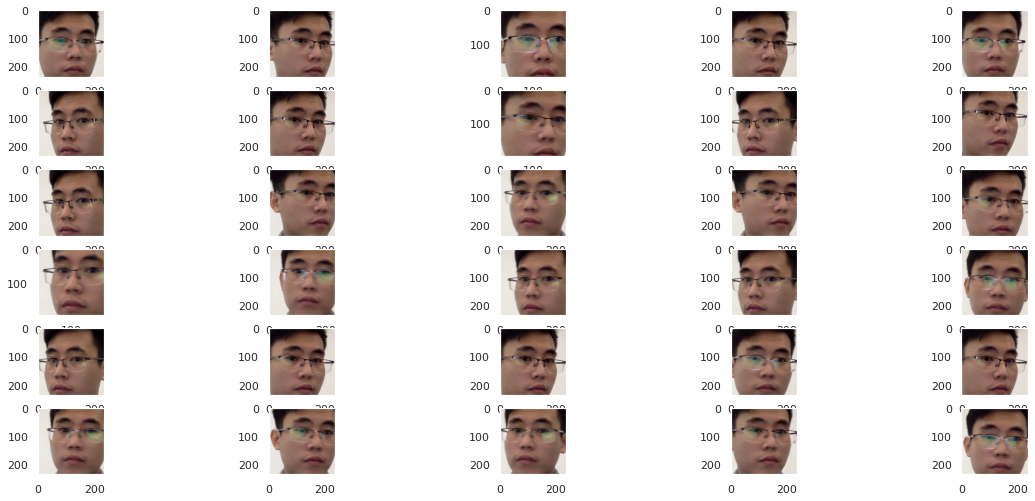

In [14]:
display_img_in_folder('out/*.jpg')

### Save Pip requirement

In [ ]:
!pip3 freeze > requirements.txt